<a href="https://colab.research.google.com/github/ch00226855/CMP414765Fall2022/blob/main/Homework04_PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4
This homework assignment will build three polynomial models on the same dataset and compare their performance. You can use tools from `sklearn` to complete this task.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [2]:
# seed so that the results are reproducible
np.random.seed(12345)

In [3]:
# set the print format on floating point numbers for numpy arrays and objects
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})

In [4]:
# dark theme for matplotlib figures
plt.style.use(["dark_background"])

In [5]:
# increase the scale of matplotlib figures
mpl.rcParams['figure.dpi'] = mpl.rcParamsDefault['figure.dpi'] * 1.2

Create the data set.

In [6]:
# generate a data set X and Y
m = 100
X = 6 * np.random.rand(m, 1) - 3
Y = 4 * X ** 3 + 5 * X ** 2 + X + 2 + np.random.randn(m, 1) * 5

In [7]:
# note the dimension
X.shape, Y.shape

((100, 1), (100, 1))

In [8]:
# convert into one dimensional arrays for creating a data frame
X = X.reshape(-1)
Y = Y.reshape(-1)

In [9]:
# create a data frame using the generated data
data = pd.DataFrame({"X":X, "Y":Y})
data[:4]

,X,Y
0,2.577697,103.199144
1,-1.101747,-2.987763
2,-1.896487,-12.828341
3,-1.772638,-5.227195


Text(0, 0.5, 'Y')

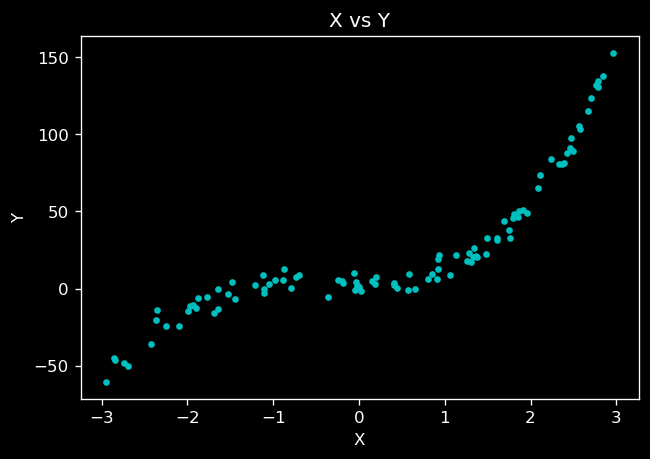

In [10]:
# create a labeled plot of the data
plt.plot(X, Y, 'c.')
plt.title("X vs Y")
plt.xlabel("X")
plt.ylabel("Y")

1. Use train_test_split to split the data into training set (80%) and test set (20%).

In [11]:
# split the data frame into two seperate data frames: one for training and one for testing
data_train, data_test = train_test_split(data, test_size=0.2)

In [12]:
# store the training and testing data in seperate variables
x_train = data_train[["X"]]
y_train = data_train["Y"]
x_test = data_test[["X"]]
y_test = data_test["Y"]

2. Build a degree 2 polynomial regression model with `X` as input variables and `Y` as output variable. Name the model `model_pr2`. Train the model on the training set and obtain the MSE on the test set.

Note: Since we are using `LinearRegression()` in conjunction with `PolynomialFeatures()`, there is no need to set `include_bias` to `True`, the former has this setting enabled by default.

In [13]:
# train the polynomial model using the training data for X and Y
x_train_polyd2 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_train)
model_pr2 = LinearRegression().fit(x_train_polyd2, y_train)

In [14]:
# get the predictions
x_test_polyd2 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_test)
y_test_predictions = model_pr2.predict(x_test_polyd2)

In [15]:
# get the mean squared error
mean_squared_error(y_test, y_test_predictions)

356.6800159846879

3. Build a degree 3 polynomial regression model with `X` as input variables and `Y` as output variable. Name the model `model_pr3`. Train the model on the training set and  obtain the MSE on the test set.

In [16]:
# train the polynomial model using the training data for X and Y
x_train_polyd3 = PolynomialFeatures(degree=3, include_bias=False).fit_transform(x_train)
model_pr3 = LinearRegression().fit(x_train_polyd3, y_train)

In [17]:
# get the predictions
x_test_polyd3 = PolynomialFeatures(degree=3, include_bias=False).fit_transform(x_test)
y_test_predictions = model_pr3.predict(x_test_polyd3)

In [18]:
# get the mean squared error
mean_squared_error(y_test, y_test_predictions)

35.46436831789008

4. Build a degree 10 polynomial regression model with `X` as input variables and `Y` as output variable. Name the model `model_pr10`. Train the model on the training set and  obtain the MSE on the test set.

In [19]:
# train the polynomial model using the training data for X and Y
x_train_polyd10 = PolynomialFeatures(degree=10, include_bias=False).fit_transform(x_train)
model_pr10 = LinearRegression().fit(x_train_polyd10, y_train)

In [20]:
# get the predictions
x_test_polyd10 = PolynomialFeatures(degree=10, include_bias=False).fit_transform(x_test)
y_test_predictions = model_pr10.predict(x_test_polyd10)

In [21]:
# get the mean squared error
mean_squared_error(y_test, y_test_predictions)

41.42169060183612

4. Results

The polynomial model of degree 3 the best mean squared error when compared to the other two models of degree 2 and degree 10.